# Euro Exchange Rates Analysis

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

## Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
exchange_rates = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_5\euro-daily-hist_1999_2020.csv')

## Checking Data

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Some of the observations from the data:
* The exchange rates are collected daily, between 4 Apr 1999 to 8 Jan 2021.
* The data are organised by date, from latest to earliest.
* There are 40 different exchange rates.
* There are null values for some exchange rates at different timestamp.
* Most of the exchange rates are formatted as object instead of float.
* The date of data collection (`Period\Unit`) is also formatted as object instead of datetime.

## Cleaning Data

For this exercise, we will focus on Euro-US Dollar exchange rate. We will do some initial cleaning of data:
* Change `Period\Unit:` to `Time`.
* Change `[US dollar ]` to `US_dollar`.
* Change `time` to a datetime data type.
* Sort the value of `time` in ascending order.

In [6]:
exchange_rates.rename(columns = {'Period\\Unit:': 'Time','[US dollar ]': 'US_dollar'}, inplace=True)

In [7]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'], format='%Y-%m-%d')

In [8]:
exchange_rates.sort_values('Time', ascending=True, inplace=True)

In [9]:
exchange_rates.reset_index(drop=True, inplace=True)

In [10]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Since we will only focus on Euro-US Dollar exchange rate, we will isolate the `Time` and the `US_dollar` columns and assign them to a different variable named `euro_to_dollar`.

In [11]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

In [12]:
euro_to_dollar.value_counts(['US_dollar'])

US_dollar
-            62
1.2276        9
1.1215        8
1.1305        7
1.1797        6
             ..
1.1894        1
1.1895        1
1.1896        1
1.1898        1
1.5990        1
Length: 3528, dtype: int64

Here we notice that that are invalid data. We will drop these.

In [13]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [14]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [15]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Analysing Data

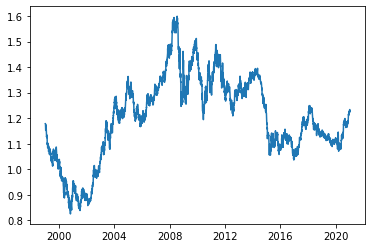

In [16]:
fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])

plt.show()

In [17]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

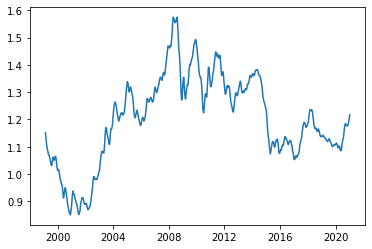

In [18]:
fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])

plt.show()

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

First, we will practise data story by showing how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison.

In [19]:
#select data between 2006 to 2009
start_date = datetime.strptime('2006-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2009-12-31', '%Y-%m-%d')
euro_to_dollar_overview = euro_to_dollar[(euro_to_dollar['Time'] > start_date) & (euro_to_dollar['Time'] <= end_date)]

#select data between 2007 to 2008
start_date = datetime.strptime('2007-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2008-12-31', '%Y-%m-%d')
euro_to_dollar_fc = euro_to_dollar[(euro_to_dollar['Time'] > start_date) & (euro_to_dollar['Time'] <= end_date)]

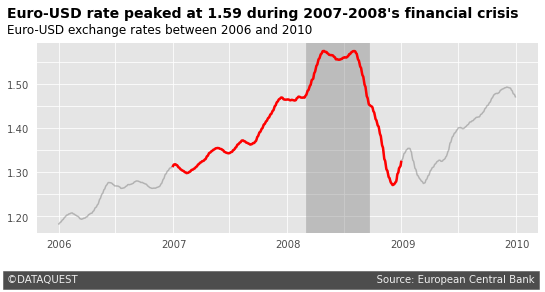

In [20]:
style.use('ggplot')

fig, ax = plt.subplots(figsize=(9,3.5))

#plot the background line
ax.plot(euro_to_dollar_overview['Time'], euro_to_dollar_overview['rolling_mean'],color='grey',alpha=0.5)

#plot the data line
ax.plot(euro_to_dollar_fc['Time'], euro_to_dollar_fc['rolling_mean'],color='red',linewidth=2.5)

#chart title
ax.text(12985, 1.65, 'Euro-USD rate peaked at 1.59 during 2007-2008\'s financial crisis', weight='bold', size=14)
ax.text(12985, 1.615, 'Euro-USD exchange rates between 2006 and 2010',size=12)

#remove the ticks labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(bottom=0, left=0)

#create customised xtick labels (x coord +366)
#ax.text(13110, 1.13, '2006')
#ax.text(13476, 1.13, '2007')
year = ['2006', '2007', '2008', '2009', '2010']
x_coord = 13110
for y in year:
    ax.text(x_coord, 1.13, y, alpha=0.7)
    x_coord += 366

#create customised ytick labels (y coord +0.1)
#ax.text(12985, 1.19, '1.20')
#ax.text(12985, 1.29, '1.30')
rate = ['1.20', '1.30', '1.40', '1.50']
y_coord = 1.19
for r in rate:
    ax.text(12985, y_coord, r, alpha=0.7)
    y_coord += 0.1
    
#create an enclosure
ax.axvspan(13940,14140, color='grey', alpha=0.4)

#create copyright text
ax.text(12985, 1.05, '©DATAQUEST' + ' '*92 + 'Source: European Central Bank', color = '#f0f0f0', 
        backgroundcolor = '#4d4d4d', size=10.15)

plt.show()

Next, we show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).
* Bush served from 20 Jan 2001 to 19 Jan 2009.
* Obama served from 20 Jan 2009 to 19 Jan 2017.
* Trump served from 20 Jan 2017 to 19 Jan 2021.

In [21]:
#selecting data during tenures of three presidents
start = datetime.strptime("2001-01-20", "%Y-%m-%d")
end = datetime.strptime("2021-01-19", "%Y-%m-%d")
euro_to_dollar_presidents = euro_to_dollar[(euro_to_dollar['Time'] >= start) & (euro_to_dollar['Time'] <= end)]

In [22]:
#selecting exchange rate dring Bush tenure
start = datetime.strptime("2001-01-20", "%Y-%m-%d")
end = datetime.strptime("2009-01-19", "%Y-%m-%d")
euro_to_dollar_bush = euro_to_dollar[(euro_to_dollar['Time'] >= start) & (euro_to_dollar['Time'] <= end)]

In [23]:
#selecting exchange rate dring Obama tenure
start = datetime.strptime("2009-01-20", "%Y-%m-%d")
end = datetime.strptime("2017-01-19", "%Y-%m-%d")
euro_to_dollar_obama = euro_to_dollar[(euro_to_dollar['Time'] >= start) & (euro_to_dollar['Time'] <= end)]

In [24]:
#selecting exchange rate dring Trump tenure
start = datetime.strptime("2017-01-20", "%Y-%m-%d")
end = datetime.strptime("2021-01-19", "%Y-%m-%d")
euro_to_dollar_trump = euro_to_dollar[(euro_to_dollar['Time'] >= start) & (euro_to_dollar['Time'] <= end)]

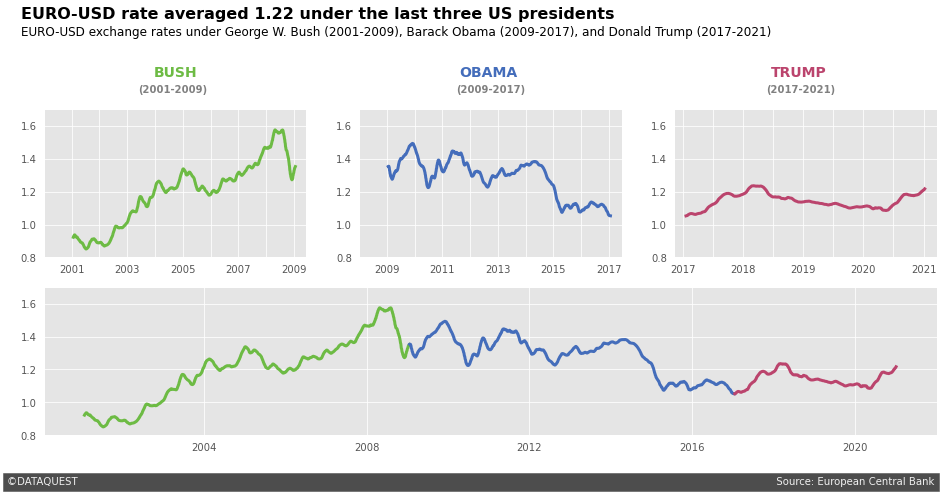

In [150]:
#create the empty charts
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

axes = [ax1, ax2, ax3, ax4]

#create the overall chart
ax4.plot(euro_to_dollar_bush['Time'], euro_to_dollar_bush['rolling_mean'], color='#6DBB44', linewidth=3)
ax4.plot(euro_to_dollar_obama['Time'], euro_to_dollar_obama['rolling_mean'], color='#446DBB', linewidth=3)
ax4.plot(euro_to_dollar_trump['Time'], euro_to_dollar_trump['rolling_mean'], color='#BB446D', linewidth=3)

#Bush chart
ax1.plot(euro_to_dollar_bush['Time'], euro_to_dollar_bush['rolling_mean'], color='#6DBB44', linewidth=3)

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(['','2001','','2003','','2005', '', '2007', '', '2009'])

#Obama chart
ax2.plot(euro_to_dollar_obama['Time'], euro_to_dollar_obama['rolling_mean'], color='#446DBB', linewidth=3)

ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(['','2009','','2011','','2013', '', '2015', '', '2017'])

#Trump chart
ax3.plot(euro_to_dollar_trump['Time'], euro_to_dollar_trump['rolling_mean'], color='#BB446D', linewidth=3)

ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(['2017','', '2018','','2019', '', '2020', '', '2021'])

#set common y-axis and remove tickers
for ax in axes:
    ax.set_ylim([0.8, 1.7])
    ax.tick_params(bottom=False, left=False)

#add chart title
ax1.text(10650, 2.25, 'EURO-USD rate averaged 1.22 under the last three US presidents', size=16, weight='bold')
ax1.text(10650, 2.15, 'EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)', size=12)

ax1.text(12400, 1.9, 'BUSH', weight='bold', size=14, color='#6DBB44')
ax1.text(12200, 1.8, '(2001-2009)', weight='bold', size=10, color='grey')

ax2.text(15200, 1.9, 'OBAMA', weight='bold', size=14, color='#446DBB')
ax2.text(15150, 1.8, '(2009-2017)', weight='bold', size=10, color='grey')

ax2.text(19300, 1.9, 'TRUMP', weight='bold', size=14, color='#BB446D')
ax2.text(19230, 1.8, '(2017-2021)', weight='bold', size=10, color='grey')

#create copyright text
ax.text(10650, 0.5, '©DATAQUEST' + ' '*215 + 'Source: European Central Bank', color = '#f0f0f0', 
        backgroundcolor = '#4d4d4d', size=10.15)

plt.show()
